# 02. Feature selection

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from sklearn.metrics import f1_score, classification_report
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.feature_selection import VarianceThreshold

from IPython.display import display_html # pour pouvoir afficher deux df côte à côte.

## 1. Analyse des corrélations

In [2]:
df = pd.read_csv('all_ready.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77728 entries, 0 to 77727
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            77728 non-null  datetime64[ns]
 1   MinTemp         77728 non-null  float64       
 2   MaxTemp         77728 non-null  float64       
 3   Rainfall        77728 non-null  float64       
 4   Evaporation     77728 non-null  float64       
 5   Sunshine        77728 non-null  float64       
 6   WindGustSpeed   77728 non-null  float64       
 7   WindSpeed9am    77728 non-null  float64       
 8   WindSpeed3pm    77728 non-null  float64       
 9   Humidity9am     77728 non-null  float64       
 10  Humidity3pm     77728 non-null  float64       
 11  Pressure9am     77728 non-null  float64       
 12  Pressure3pm     77728 non-null  float64       
 13  Cloud9am        77728 non-null  float64       
 14  Cloud3pm        77728 non-null  float64       
 15  Te

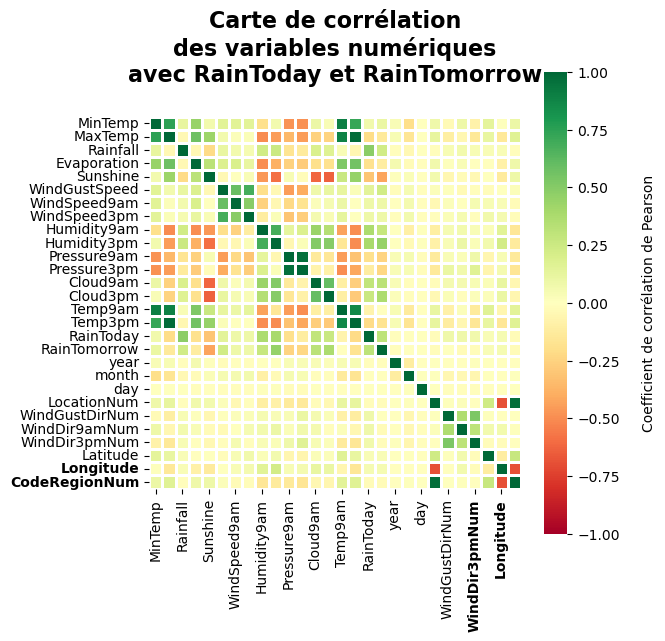

In [5]:
df.drop(columns = ['Date', 'NonMesNum'], inplace = True)
## Initialisation de la toile
fig, ax = plt.subplots(figsize = (6, 6))

## Traçage
sns.heatmap(df.corr(), 
            square = True, 
            linewidth = 1, 
            vmin = -1, 
            vmax = 1, 
            cmap = "RdYlGn", 
            cbar_kws = {"label": "\nCoefficient de corrélation de Pearson"})

## Mise en forme
plt.title("Carte de corrélation\ndes variables numériques\navec RainToday et RainTomorrow\n", 
          fontweight = "bold", 
          fontsize = 16)

# Mise en évidence de la variable cible `RainTomorrow`
ax.get_xticklabels()[-1].set_weight("bold")
ax.get_xticklabels()[-2].set_weight("bold")
ax.get_yticklabels()[-1].set_weight("bold")
ax.get_yticklabels()[-2].set_weight("bold")

plt.show()

## Feature selection

Faire une RFE (Recursive Feature Elimination) avec le meilleur modèle, ici RdF et ses best params trouvés par GridSearchCV, le tout avec une crossval?

Appliquer l'embedded Method? Mais il n'y a pas de coefficient de régularisation dans RdF si?